# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [106]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=False)

In [109]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))

## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [110]:
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8 days,16 days,0,delivered,0.0,0.0,4.0,1.0,1.0,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,14 days,20 days,0,delivered,0.0,0.0,4.0,1.0,1.0,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9 days,27 days,0,delivered,1.0,0.0,5.0,1.0,1.0,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,14 days,27 days,0,delivered,1.0,0.0,5.0,1.0,1.0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,3 days,13 days,0,delivered,1.0,0.0,5.0,1.0,1.0,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
97002,9c5dedf39a927c1b2549525ed64a053c,8 days,19 days,0,delivered,1.0,0.0,5.0,1.0,1.0,72.00,13.08
97003,63943bddc261676b46f01ca7ac2f7bd8,22 days,24 days,0,delivered,0.0,0.0,4.0,1.0,1.0,174.90,20.10
97004,83c1379a015df1e13d02aae0204711ab,25 days,31 days,0,delivered,1.0,0.0,5.0,1.0,1.0,205.99,65.02
97005,11c177c8e97725db2631073c19f07b62,17 days,38 days,0,delivered,0.0,0.0,2.0,2.0,2.0,179.99,40.59


In [111]:
orders.describe()

,wait_time,expected_wait_time,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,96353,96353,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000
mean,12 days 11:04:33.681151598,24 days 09:04:45.711913484,0.592187,0.097610,4.155688,1.141687,1.141687,124.869968,20.131616
std,9 days 11:11:29.466066756,8 days 18:09:29.240733972,0.491431,0.296788,1.284979,0.535362,0.535362,187.976890,15.653046
min,0 days 00:00:00,3 days 00:00:00,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,7 days 00:00:00,19 days 00:00:00,0.000000,0.000000,4.000000,1.000000,1.000000,41.900000,13.370000
50%,10 days 00:00:00,24 days 00:00:00,1.000000,0.000000,5.000000,1.000000,1.000000,79.000000,16.350000
75%,16 days 00:00:00,29 days 00:00:00,1.000000,0.000000,5.000000,1.000000,1.000000,139.650000,21.150000
max,208 days 00:00:00,156 days 00:00:00,1.000000,1.000000,5.000000,21.000000,21.000000,6735.000000,409.680000


In [112]:
orders.dtypes

order_id                       object
wait_time             timedelta64[ns]
expected_wait_time    timedelta64[ns]
delay_vs_expected              object
order_status                   object
dim_is_five_star              float64
dim_is_one_star               float64
review_score                  float64
number_of_products            float64
number_of_sellers             float64
price                         float64
freight_value                 float64
dtype: object

📈 Plot histograms to get a sense of the distribution of each numerical feature.

In [113]:
orders_work = orders.copy()
orders_work['wait_time'] = orders_work.loc[:,'wait_time'].dt.days
orders_work['delay_vs_expected'] = orders_work['delay_vs_expected'].astype('timedelta64[D]')
orders_work['delay_vs_expected'] = orders_work.loc[:,'delay_vs_expected'].dt.days

<AxesSubplot:xlabel='wait_time', ylabel='Count'>

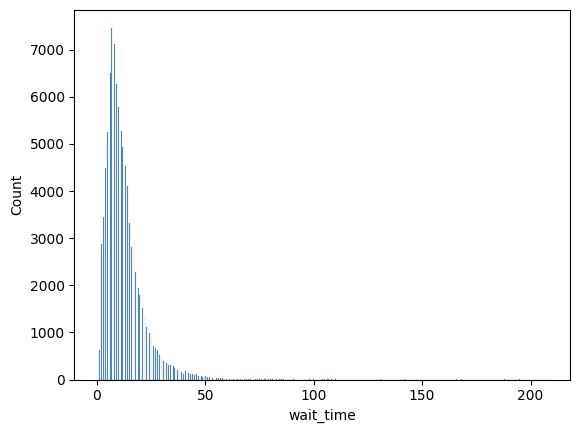

In [114]:
sns.histplot(data=orders_work, x="wait_time")

👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

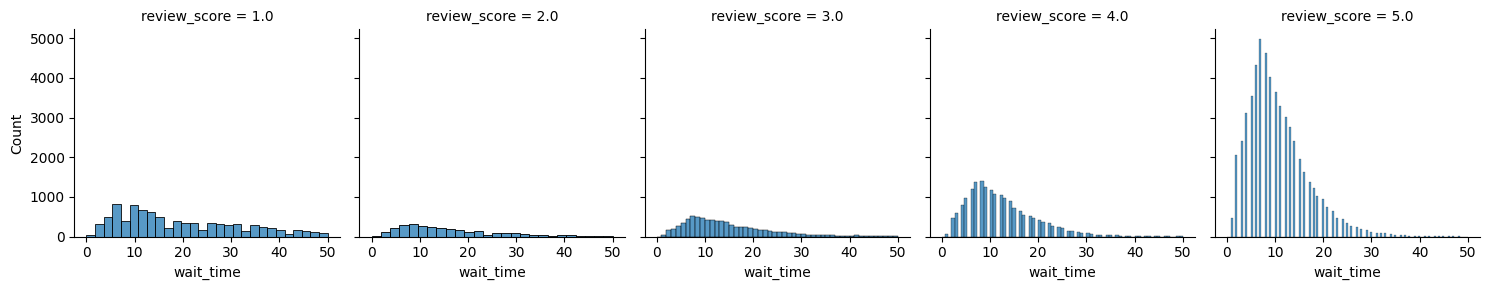

In [115]:
g = sns.FacetGrid(orders_work, col="review_score")
g.map(sns.histplot, "wait_time", binrange=(0, 50))

❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

<AxesSubplot:xlabel='price', ylabel='Count'>

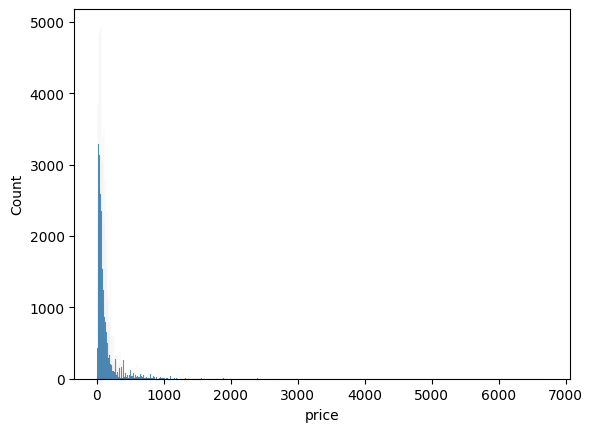

In [116]:
sns.histplot(data=orders_work, x="price")

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

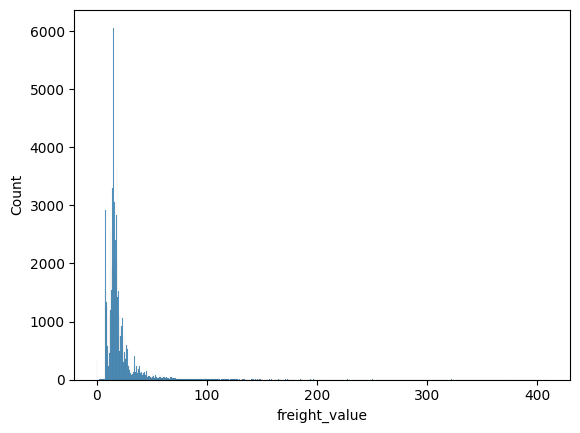

In [117]:
sns.histplot(data=orders_work, x="freight_value")

In [118]:
# YOUR CODE HERE

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

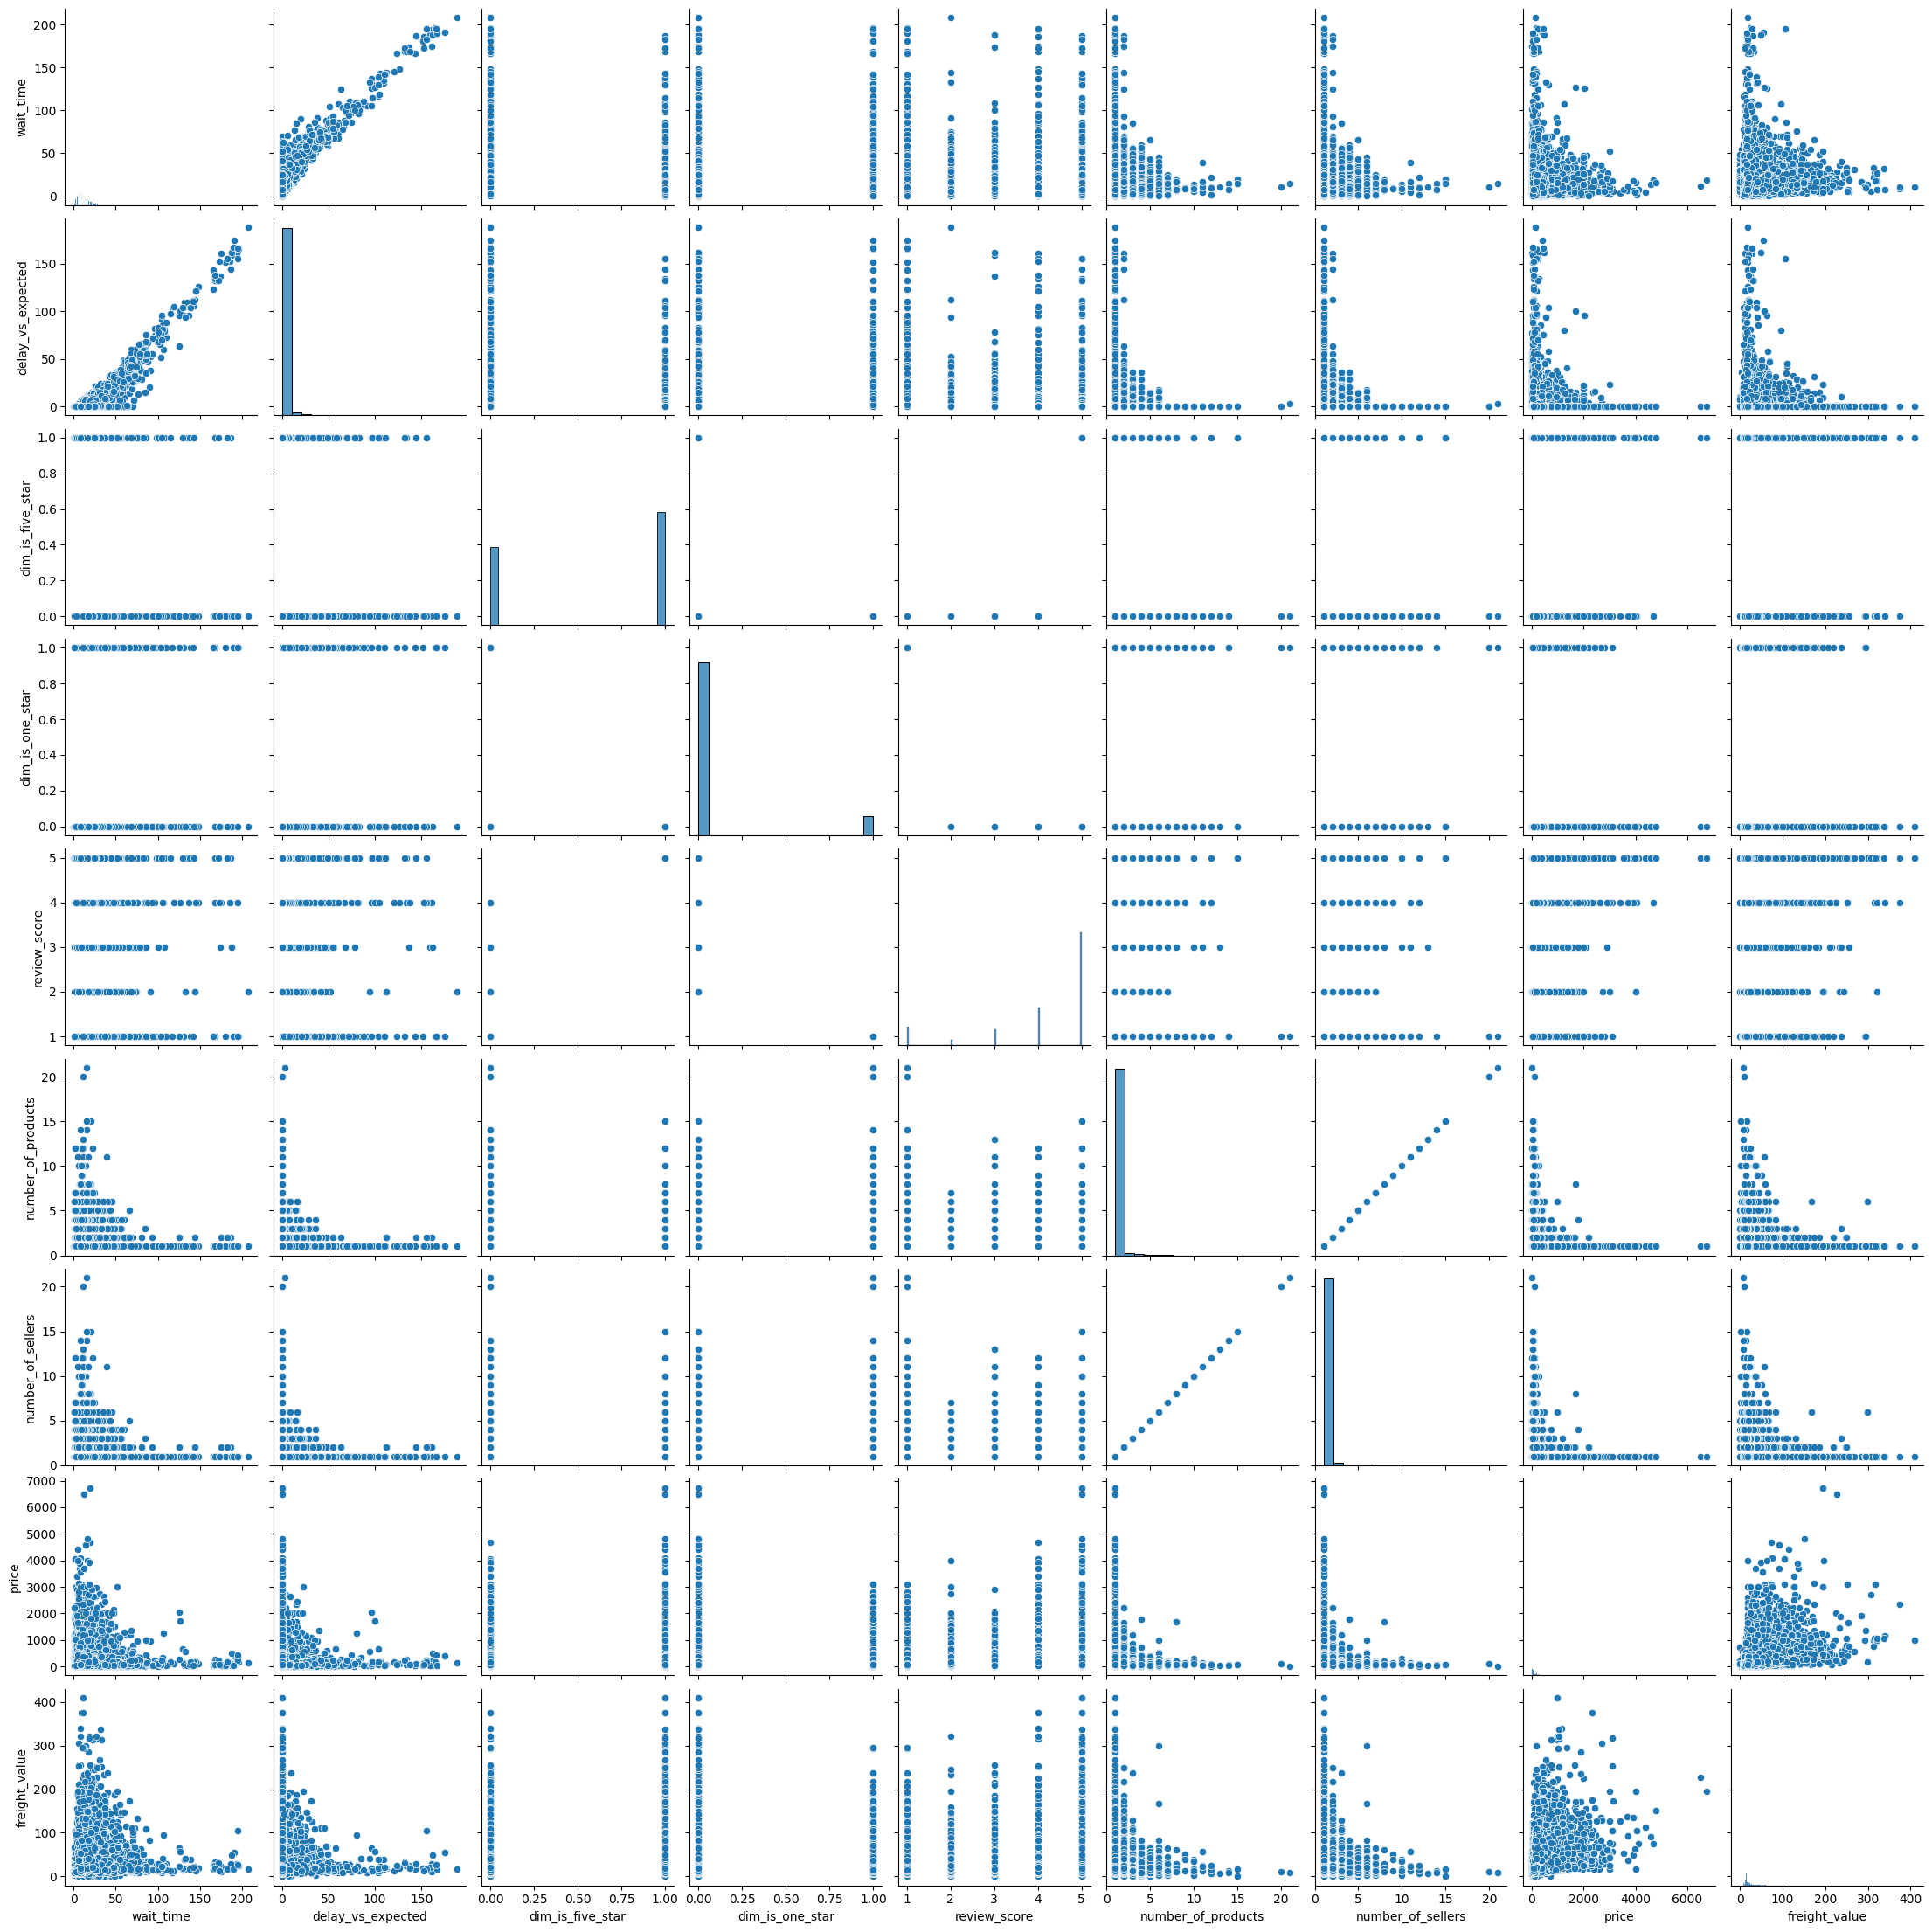

In [119]:
sns.pairplot(orders_work)

* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

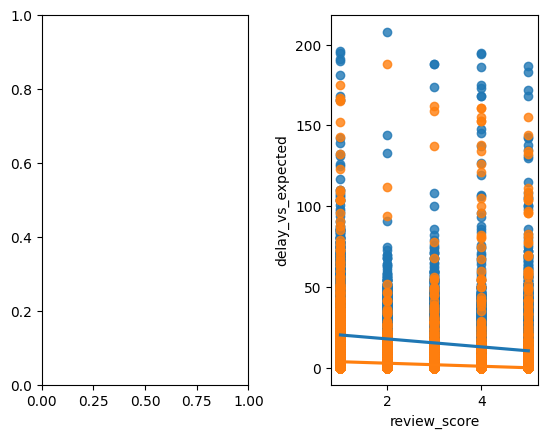

In [120]:
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
ax0 = plt.subplot(grid[0, 0])
ax1 = plt.subplot(grid[0, 1:])

ax0 = sns.regplot(x = orders_work['review_score'], y = orders_work['wait_time'])
ax1 = sns.regplot(x = orders_work['review_score'], y = orders_work['delay_vs_expected'])

In [121]:
orders_sample = orders_work.sample(10000, random_state = 2)
orders_sample

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
32076,ca23ddf87cf569c651185e5ad2628e2d,13,27 days,0,delivered,1.0,0.0,5.0,1.0,1.0,70.00,23.07
9501,b8dbf67f537e4897a9d5d6569fd7ea01,20,31 days,0,delivered,0.0,0.0,3.0,1.0,1.0,199.99,24.55
69815,5b6d41acb7c2e60bf82df4d27888b501,12,39 days,0,delivered,1.0,0.0,5.0,1.0,1.0,189.00,19.20
4914,dfd71e944918d4442a05232a620087cc,8,16 days,0,delivered,1.0,0.0,5.0,1.0,1.0,49.90,18.45
73423,90a6c3a55e9c9cf3db4bd490b9ab44c7,5,18 days,0,delivered,1.0,0.0,5.0,1.0,1.0,169.90,14.55
...,...,...,...,...,...,...,...,...,...,...,...,...
55902,b85a7527aeed7648354efec94c8db7fd,19,27 days,0,delivered,0.0,0.0,4.0,1.0,1.0,199.00,16.14
4136,6c3135486d8821b2877a0f8d92095a6d,10,35 days,0,delivered,1.0,0.0,5.0,1.0,1.0,18.99,17.78
25720,5cca397d52ba2f962523520cc83db7ba,10,23 days,0,delivered,1.0,0.0,5.0,1.0,1.0,79.99,18.17
77324,293e34b72465ae7478f59d4d0b3e58ba,8,16 days,0,delivered,0.0,0.0,4.0,1.0,1.0,18.90,13.47


/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wait_time', ylabel='review_score'>

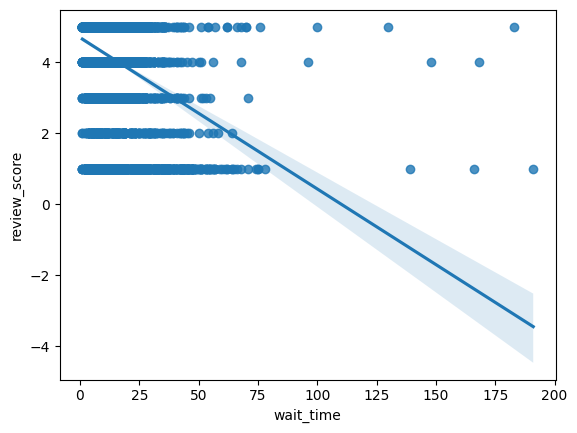

In [122]:
sns.regplot(orders_sample['wait_time'], orders_sample['review_score'])

<AxesSubplot:xlabel='delay_vs_expected', ylabel='review_score'>

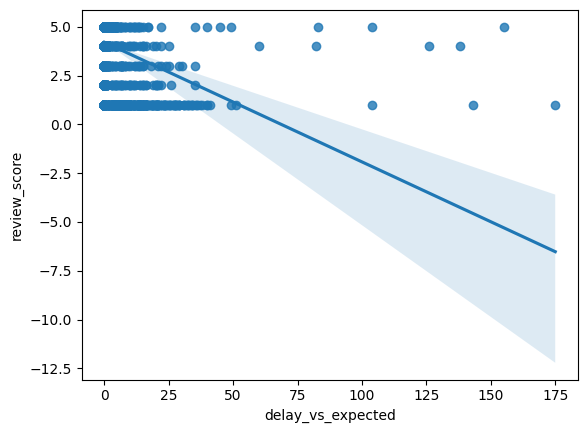

In [123]:
sns.regplot(orders_sample['delay_vs_expected'], orders_sample['review_score'])

ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

> YOUR ANSWER HERE

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

<AxesSubplot:xlabel='delay_vs_expected', ylabel='review_score'>

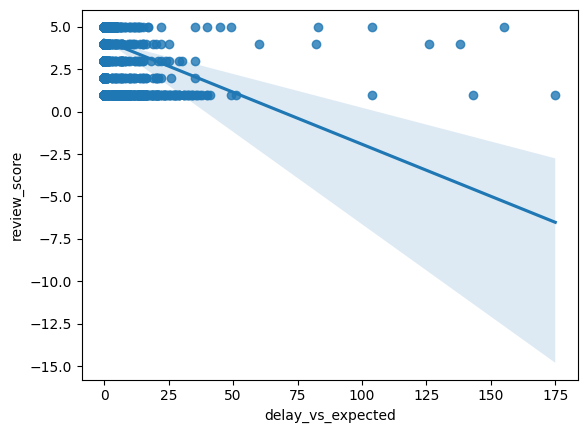

In [130]:
sns.regplot(orders_sample['delay_vs_expected'], orders_sample['review_score'], ci=99)

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the impact of delivery time on review scores is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook